In [38]:
import seaborn as sbn
import numpy as np
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [385]:
T = np.linspace(0,1,101)
ql = 1
qh = 2
fb = 0.0
fs = 0.0
wb = 0.0
ws = 0.0
tol = 0.0001

In [3]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.3
T1 = (p-pl)/(qh-ql)
T2 = (p+fb-wb)/qh
T3 = (p+fb-wb)/ql
T4 = (ph-p)/(qh-ql)
data = pd.DataFrame({"T":T, "p":p, "T1":T1, "T2":T2, "T3":T3, "T4":T4})
data["pl"] = pl
data["ph"] = ph

## Segmentation

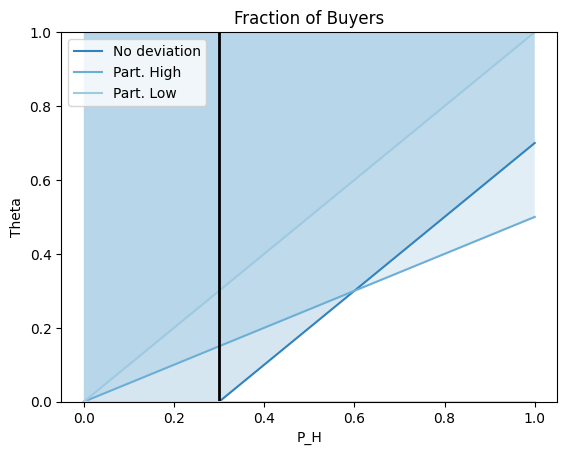

In [ ]:
sbn.set_palette("tab20c")
fig1 = sbn.lineplot(data, x = p, y = T1, label = 'No deviation').fill_between(p, T1, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T2, label = 'Part. High').fill_between(p, T2, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T3, label = 'Part. Low').fill_between(p, T3, y2 = 1, alpha = 0.2)
sbn.lineplot(x = pl, y = T, estimator=None, linewidth = 2, color = 'black').set(title = 'Fraction of Buyers', xlabel = 'P_H', ylabel = 'Theta')
sbn.lineplot(x = [0,1], y = [0,0]).set_ylim([0,1])
plt.show()

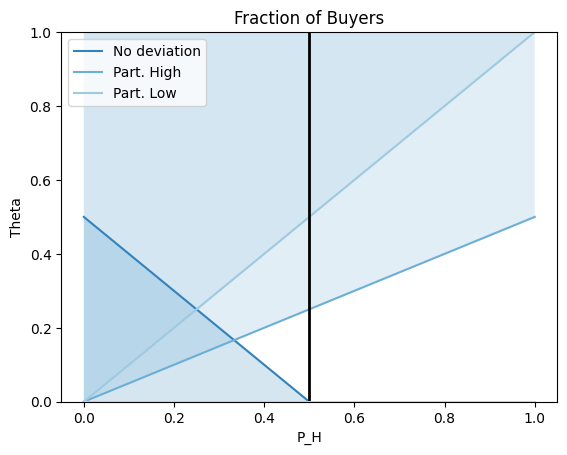

In [ ]:
fig2 = sbn.lineplot(data, x = p, y = T4, label = 'No deviation').fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(data, x = p, y = T2, label = 'Part. High').fill_between(p, T2, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T3, label = 'Part. Low').fill_between(p, T3, y2 = 1, alpha = 0.2)
sbn.lineplot(x = ph, y = T, estimator=None, linewidth = 2, color = 'black').set(title = 'Fraction of Buyers', xlabel = 'P_H', ylabel = 'Theta')
sbn.lineplot(x = [0,1], y = [0,0]).set_ylim([0,1])
plt.show()

## Agglomeration

In [4]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = pl/ql*np.ones(101)
T2 = (p-pl)/(qh-ql)
T3 = [max([0,pi/qh, (pi-pl)/(qh-ql)]) for pi in p]
T4 = [min(pi/qh, pl/ql) for pi in p]

In [5]:
(pl/ql)*qh

0.4

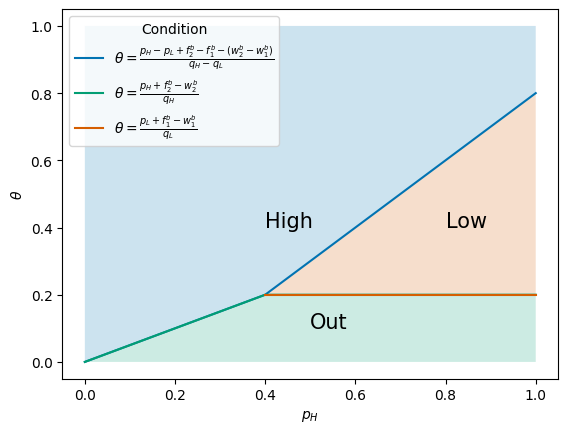

In [6]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[40:], y = T1[40:], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[40:], T1[40:], y2 = T2[40:], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_H$', ylabel = r'$\theta$')
sbn.lineplot().text(0.40, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.8, 0.4, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_ph.png")
plt.show()

In [7]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = p/ql*np.ones(101)
T2 = (ph-p)/(qh-ql)
T3 = [max([0,ph/qh, (ph-pi)/(qh-ql)]) for pi in p]
T4 = [min(ph/qh, pi/ql) for pi in p]

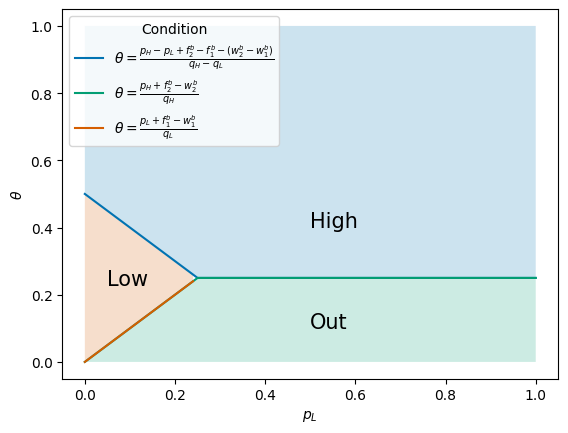

In [8]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[:25], y = T1[:25], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[:25], T1[:25], y2 = T2[:25], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_L$', ylabel = r'$\theta$')
sbn.lineplot().text(0.5, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.05, 0.23, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_pl.png")
plt.show()

## Seller Profit

\begin{align}
    \overline{\theta} = \max\left\lbrace \frac{p_H+f_2^b-w_2^b}{q_H}, \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}\right\rbrace  \\
    \underline{\theta} = \max\left\lbrace 0,\frac{p_L+f_1^b-w_1^b}{q_L}\right\rbrace
\end{align}

## Seller price setting strategies

In [9]:
def overline_theta(pl, ph):
  return max(ph/qh, (ph-pl)/(qh-ql))
def underline_theta(pl, ph):
  return max(0, pl/ql)

In [10]:
def pih(pl,ph, cl,ch):
  return (1-overline_theta(pl,ph))*(ph-ch)
def pil(pl,ph, cl,ch):
  return (overline_theta(pl,ph)-underline_theta(pl,ph))*(pl-cl)

In [11]:
cl = 0.1
ch = 0.3
p = np.linspace(0,1,1001)

In [12]:
br_h = []
ben_h = []
for pk in p:
  Pih = [pih(pk,pr,cl,ch) for pr in p]
  ben_h.append(max(Pih))
  br_h.append(p[Pih.index(max(Pih))])
br_l = []
ben_l = []
for pk in p:
  Pil = [pil(pr,pk,cl,ch) for pr in p]
  ben_l.append(max(Pil))
  br_l.append(p[Pil.index(max(Pil))])

In [13]:
def find_eq(pl,ph):
  pln = 100
  phn = 100
  iter = 0
  while (pl != pln) or (ph != phn):
    pln = pl
    phn = ph
    Pil = [pil(pr,phn,cl,ch) for pr in p]
    pl = p[Pil.index(max(Pil))]
    Pih = [pih(pln,pr,cl,ch) for pr in p]
    ph = p[Pih.index(max(Pih))]
    iter += 1
    if iter >= 100:
      print("Not")
      break
  return pl, ph

In [14]:
pls, phs = find_eq(pl, ph)
pls, phs

(0.243, 0.771)

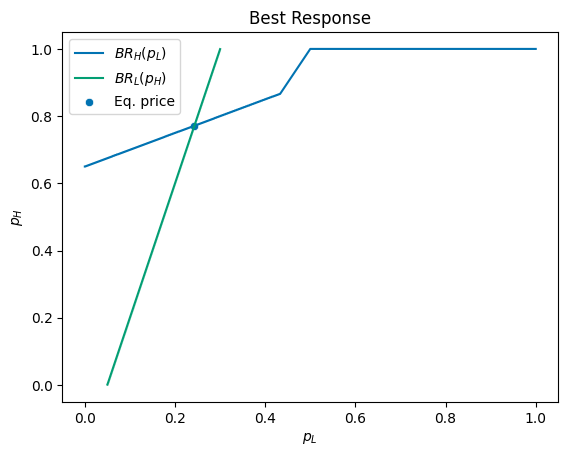

In [15]:
sbn.lineplot(x = p, y = br_h, label = r"$BR_H(p_L)$")
sbn.lineplot(x = br_l, y = p, label = r"$BR_L(p_H)$")
sbn.scatterplot(x = [pls], y = [phs], label = "Eq. price").set(title = 'Best Response', xlabel = r"$p_L$", ylabel = r"$p_H$")
plt.show()

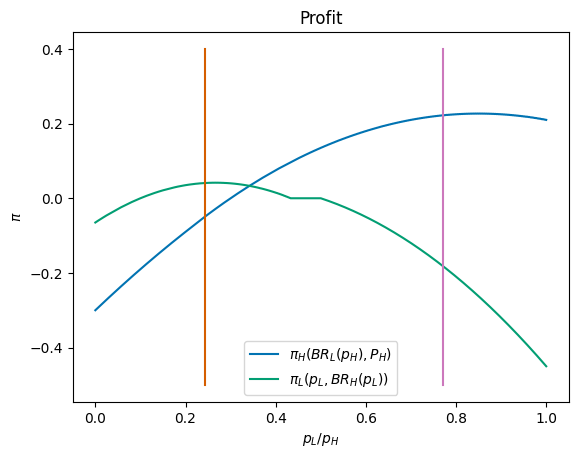

In [16]:
#Rational Sellers
sbn.lineplot(x = p, y = [pih(br_l[i], p[i], cl, ch) for i in range(0, 1001)], label = r"$\pi_H(BR_L(p_H), P_H)$")
sbn.lineplot(x = p, y = [pil(p[i], br_h[i], cl, ch) for i in range(0, 1001)], label = r"$\pi_L(p_L, BR_H(p_L))$").set(title = 'Profit', xlabel = r"$p_L/ p_H$", ylabel = r"$\pi$")
sbn.lineplot(x = [pls, pls], y = [-0.5,0.4], estimator = None)
sbn.lineplot(x = [phs, phs], y = [-0.5,0.4], estimator = None)
plt.show()

In [17]:
#Check if conditions for buyer behaviour hold in this eq.
# Buyers of high quality type
print(overline_theta(pls, phs)*qh - phs  >= 0)
print(overline_theta(pls, phs)*qh - phs >= overline_theta(pls, phs)*ql - pls)

True
True


In [18]:
#Buyers of low quality type
print(underline_theta(pls, phs)*ql - pls  >= 0)
print(underline_theta(pls, phs)*ql - pls >= underline_theta(pls, phs)*qh - phs)

True
True


## Full Model

In [19]:
## k1b = f1b-w1b
## k2b = f2b-w2b
def overline_theta(pl, ph, k1b, k2b):
  return max((ph+k2b)/qh, (ph-pl+k2b-k1b)/(qh-ql))
def underline_theta(pl, ph, k1b, k2b):
  return max(0, (pl+k1b)/ql)

In [325]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)-k2s
def pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return (overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)-k1s

In [324]:
## k1s = f1s-w1s
## k2s = f2s-w2s
def m_pih(ph,pl, k1b, k2b, cl,ch, k1s, k2s):
  return -(1-overline_theta(pl,ph, k1b,k2b))*(ph-ch)+k2s
def m_pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  return -(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*(pl-cl)+k1s

In [348]:
# OLD
def find_eq(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  pln = 100
  phn = 100
  iter = 0
  while (pl != pln) or (ph != phn):
    pln = pl
    phn = ph
    Pil = [pil(pr,phn,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    pl = p[Pil.index(max(Pil))]
    Pih = [pih(pln,pr,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    ph = p[Pih.index(max(Pih))]
    iter += 1
    if iter >= 100:
      print("Buy eq. not found")
      break
  return pl, ph

In [358]:
def find_eq(pl,ph, k1b, k2b, cl,ch, k1s, k2s):
  pln = 100
  phn = 100
  iter = 0
  while np.sqrt((pl-pln)**2 +(ph - phn)**2)>=tol:
    pln = pl
    phn = ph
    pl = minimize_scalar(m_pil, args = (phn, k1b, k2b, cl,ch, k1s, k2s), bounds=(0, 1), method='bounded').x
    ph = minimize_scalar(m_pih, args = (pln, k1b, k2b, cl,ch, k1s, k2s), bounds=(0, 1), method='bounded').x
    iter += 1
    if iter >= 100:
      print("Buy eq. not found")
      break
  return pl, ph

In [353]:
def plot_sel_eq(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  br_h = []
  ben_h = []
  p = np.linspace(0,1,201)
  for pk in p:
    Pih = [pih(pk,pr,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    ben_h.append(max(Pih))
    br_h.append(p[Pih.index(max(Pih))])
  br_l = []
  ben_l = []
  for pk in p:
    Pil = [pil(pr,pk,k1b, k2b, cl,ch, k1s, k2s) for pr in p]
    ben_l.append(max(Pil))
    br_l.append(p[Pil.index(max(Pil))])
  sbn.lineplot(x = p, y = br_h, label = r"$BR_H(p_L)$")
  sbn.lineplot(x = br_l, y = p, label = r"$BR_L(p_H)$")
  sbn.scatterplot(x = [pl], y = [ph], label = "Eq. price").set(title = 'Best Response', xlabel = r"$p_L$", ylabel = r"$p_H$")
  fig1 = plt.show()
  #Rational Sellers
  sbn.lineplot(x = p, y = [pih(br_l[i], p[i], k1b,k2b,cl, ch, k1s, k2s) for i in range(0, 201)], label = r"$\pi_H(BR_L(p_H), P_H)$")
  sbn.lineplot(x = p, y = [pil(p[i], br_h[i], k1b,k2b,cl, ch, k1s, k2s) for i in range(0, 201)], label = r"$\pi_L(p_L, BR_H(p_L))$").set(title = 'Profit', xlabel = r"$p_L/ p_H$", ylabel = r"$\pi$")
  sbn.lineplot(x = [pl, pl], y = [-0.5,0.4], estimator = None)
  sbn.lineplot(x = [ph, ph], y = [-0.5,0.4], estimator = None)
  plt.show()
  return fig1

In [338]:
def plot_buy_eq(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  Th = np.linspace(0,1,101)
  V1L = Th*ql - pl-k1b
  V2H = Th*qh - ph-k2b
  th_ov = overline_theta(pl, ph, k1b, k2b)
  th_un = underline_theta(pl, ph, k1b, k2b)
  sbn.lineplot(x = Th, y = V1L, label = r"$V_{1,L}^\theta$")
  sbn.lineplot(x = Th, y = V2H, label = r"$V_{2,H}^\theta$")
  sbn.lineplot(x = Th, y = np.zeros(101), linestyle = 'dashed', color = 'black')
  sbn.lineplot(x = [th_un, th_un], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'${\theta}$')
  sbn.lineplot(x = [th_ov, th_ov], y = [min(min(V1L), min(V2H)), max(max(V1L), max(V2H))]
               , estimator = None, color = 'black', linestyle = 'dashed', label = r'$\overline{\theta}$').set(title = 'Buyer Utility', xlabel = r"$\theta$", ylabel = r"$V^\theta$")
  fig2 = plt.show()
  return fig2

In [339]:
def validate_eq_buy(pl, ph, k1b, k2b, cl,ch, k1s, k2s):
  #Check if conditions for buyer behaviour hold in this eq.
  # Buyers of high quality type
  print(overline_theta(pl,ph, k1b, k2b)*qh - ph - k2b >= 0)
  print(overline_theta(pl, ph, k1b, k2b)*qh - ph -k2b >= overline_theta(pl, ph, k1b, k2b)*ql-pl-k1b)
  #Buyers of low quality type
  print(underline_theta(pl, ph, k1b, k2b)*ql - pl -k1b  >= 0)
  print(underline_theta(pl, ph, k1b,k2b)*ql - pl-k1b >= underline_theta(pl, ph, k1b, k2b)*qh - ph-k2b)
  return

In [421]:
cl = 0.0
ch = 0.0
ql = 1
qh = 2
k1b = 0.0
k2b = 0.0
k1s = 0.0
k2s = 0.0
p = np.linspace(0,1,1001)

In [359]:
pl_eq, ph_eq = find_eq(0.2,0.5, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.14285707473754883, 0.5714286804199219)

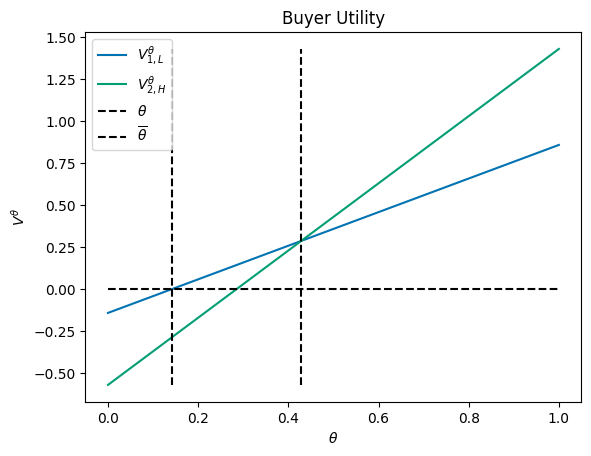

In [360]:
plot_buy_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

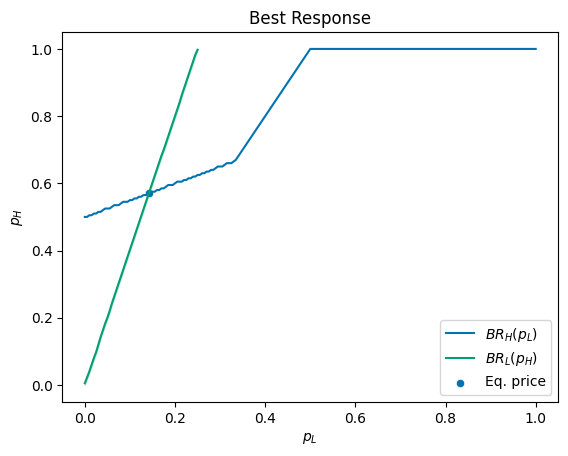

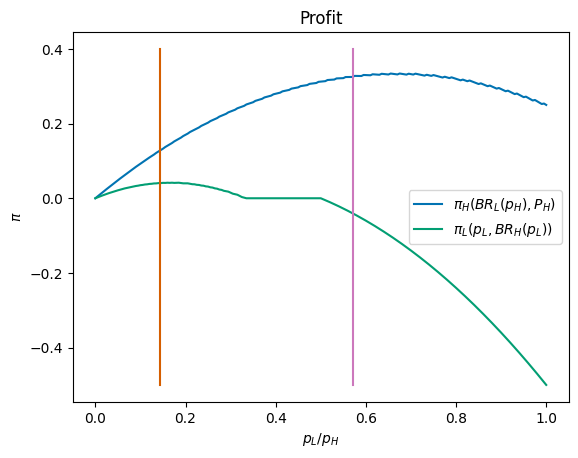

In [361]:
plot_sel_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

## Platform Profit

$\pi_1 = (I_L)f_1^s + (\overline{\theta}-\underline{\theta})f_1^b-F(w_1^b, w_1^s)$

$\pi_2 = (I_H)f_2^s + (1-\overline{\theta})f_2^b-F(w_2^b, w_2^s)$

In [422]:
def m_pi1(x, cl,ch, k2):
  k1b, k1s = x[0], x[1]
  k2b, k2s = k2[0], k2[1]
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -k1s-(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*k1b
  else:
    return 0.0
def m_pi2(x, cl,ch, k1):
  k2b, k2s = x[0], x[1]
  k1b, k1s = k1[0], k1[1]
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -k2s-(1-overline_theta(pl,ph, k1b, k2b))*k2b
  else:
    return 0.0

In [423]:
def find_plat_eq(k1,k2, cl,ch):
  k1n = np.array([100, 100])
  k2n = np.array([100, 100])
  iter = 0
  while (np.linalg.norm(k1n-k1)>tol) or (np.linalg.norm(k2n- k2)>tol):
    k1n = k1
    k2n = k2
    k1 = minimize(m_pi1, x0 = k1n, args = (cl,ch, k2n), bounds = ([-1,1], [-1,1]),  method = 'Nelder-Mead', options = {'initial_simplex':np.array([[-1,0],[0,0], [0,-1]])}).x
    k2 = minimize(m_pi2, x0 = k2n, args = (cl,ch, k1n), bounds = ([-1,1], [-1,1]),  method = 'Nelder-Mead', options = {'initial_simplex':np.array([[-1,0],[0,0], [0,-1]])}).x
    iter += 1
    if iter >= 100:
      print("Not")
      break
  return k1,k2

In [424]:
k1,k2 = find_plat_eq(np.array([k1b,k1s]),np.array([k2b, k2s]), cl,ch)
k1b,k1s = k1[0], k1[1]
k2b,k2s = k2[0], k2[1]

In [425]:
k1,k2

(array([0.04893727, 0.04279912]), array([0.17086908, 0.26230888]))

In [426]:
m_pi1(k1, cl,ch, k2), m_pi2(k2, cl,ch, k1)

(-0.05711724228380678, -0.34982669254251986)

In [427]:
pl_eq, ph_eq = find_eq(0,0.0, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.1462894295313516, 0.5121654138810873)

In [428]:
pih(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s),pil(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s)

(1.825396266408319e-05, 2.3986067977307957e-06)

In [429]:
m_pih(ph_eq,pl_eq, k1b, k2b, cl,ch, k1s, k2s),m_pil(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s)

(-1.825396266408319e-05, -2.3986067977307957e-06)

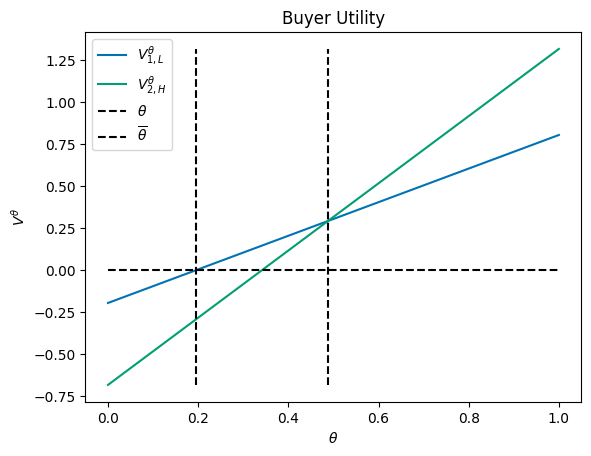

In [430]:
plot_buy_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

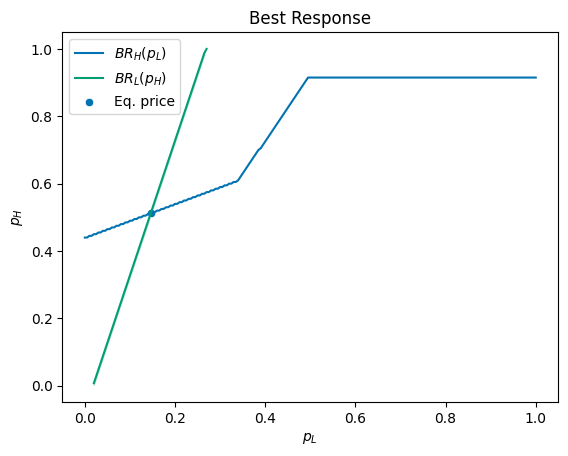

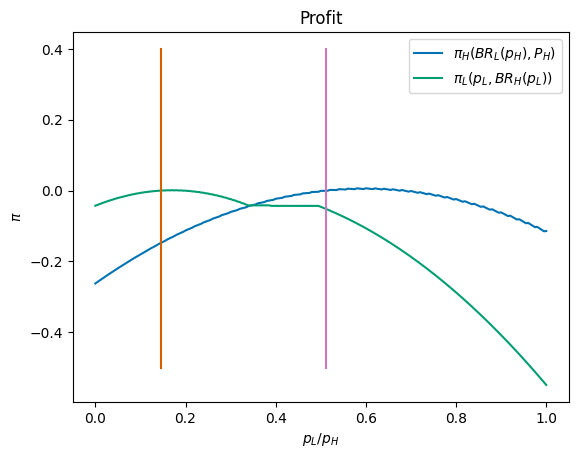

In [431]:
plot_sel_eq(pl_eq, ph_eq, k1b, k2b, cl,ch, k1s, k2s)

## With Platform Benefits


In [432]:
def F1(w1b,w1s):
  return w1b**2+w1s**2
def F2(w2b,w2s):
  return w2b**2+w2s**2

In [433]:
def m_pi1(x, cl,ch, k2):
  f1b, f1s, w1b, w1s = x[0], x[1], x[2], x[3]
  f2b, f2s, w2b, w2s = k2[0], k2[1], k2[2], k2[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pil(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -f1s-(overline_theta(pl,ph, k1b, k2b)-underline_theta(pl,ph, k1b,k2b))*f1b+F1(w1b,w1s)
  else:
    return 0.0
def m_pi2(x, cl,ch, k1):
  f2b, f2s, w2b, w2s = x[0], x[1], x[2], x[3]
  f1b, f1s, w1b, w1s = k1[0], k1[1], k1[2], k1[3]
  k1b = f1b - w1b
  k2b = f2b - w2b
  k1s = f1s - w1s
  k2s = f2s - w2s
  pl, ph = find_eq(0.0,0.0, k1b, k2b, cl,ch, k1s, k2s)
  if pih(pl,ph, k1b, k2b, cl,ch, k1s, k2s) >= 0.0:
    return -f2s-(1-overline_theta(pl,ph, k1b, k2b))*f2b+F2(w2b,w2s)
  else:
    return 0.0

In [442]:
def find_plat_eq(k1,k2, cl,ch):
  k1n = np.array([100, 100, 100, 100])
  k2n = np.array([100, 100, 100, 100])
  iter = 0
  while (np.linalg.norm(k1n-k1)>tol) or (np.linalg.norm(k2n- k2)>tol):
    k1n = k1
    k2n = k2
    k1 = minimize(m_pi1, x0 = k1n, args = (cl,ch, k2n), bounds = ([-1,1], [-1,1],[0,1], [0,1]),  method = 'Nelder-Mead',
                  options = {'initial_simplex':np.array([[-1,0,0,0],[0,0,0,0], [0,-1,0,0], [0,0,0,1], [0,0,1,0]])}).x
    k2 = minimize(m_pi2, x0 = k2n, args = (cl,ch, k1n), bounds = ([-1,1], [-1,1],[0,1], [0,1]),  method = 'Nelder-Mead',
                  options = {'initial_simplex':np.array([[-1,0,0,0],[0,0,0,0], [0,-1,0,0], [0,0,0,1], [0,0,1,0]])}).x
    iter += 1
    if iter >= 20:
      print("Not")
      break
  return k1,k2

In [443]:
k1, k2 = find_plat_eq(np.array([0,0,0,0]),np.array([0,0,0,0]), cl,ch)

Not


In [444]:
m_pi1(k1, cl,ch, k2), m_pi2(k2, cl,ch, k1)

(-0.2833730092402911, -0.6735383213233506)

In [447]:
k1b = k1[0]-k1[2]
k2b = k2[0]-k2[2]
k1s = k1[1]-k1[3]
k2s = k2[1]-k2[3]
pl_eq, ph_eq = find_eq(0,0.0, k1b, k2b, cl,ch, k1s, k2s)
pl_eq, ph_eq

(0.1121966577357385, 0.626603008738243)

In [446]:
pih(pl,ph, k1b, k2b, cl,ch, k1[1]-k1[3],k2[1]-k2[3])

0.01034012820139818

In [448]:
pih(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s),pil(pl_eq,ph_eq, k1b, k2b, cl,ch, k1s, k2s)

(0.0018969013346930574, 5.5129441962738224e-05)